# Radar Aeroecology Virtual Lab tutorial

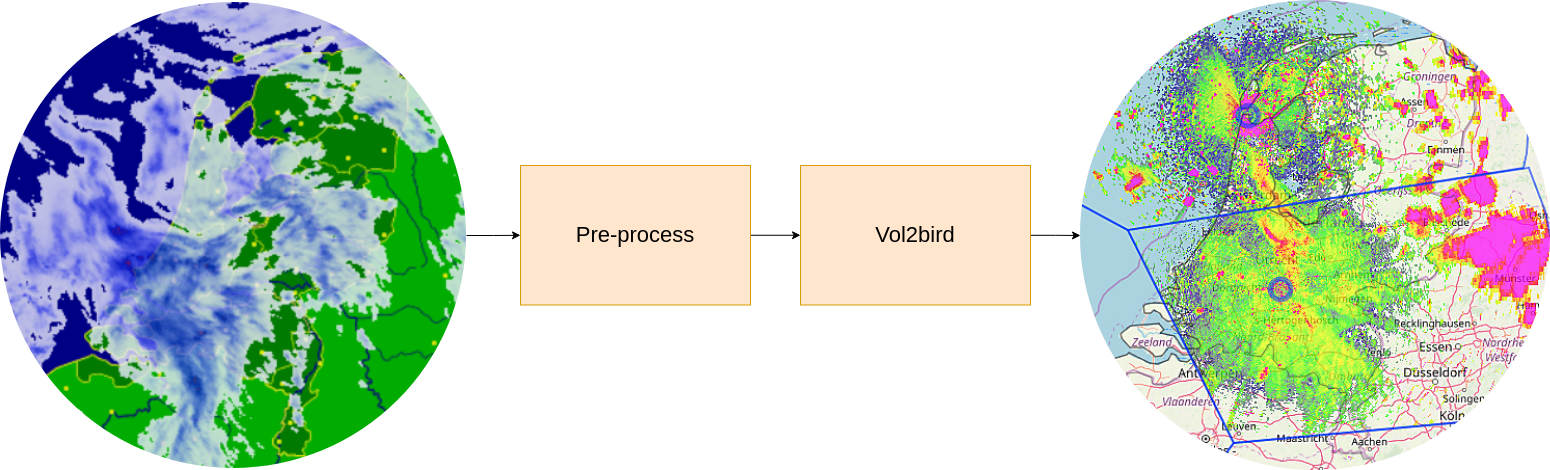

This tutorial introduces the Radar Aeroecology Virtual Lab (RAVL), a tool developed by the [Animal Movement Ecology](https://ibed.uva.nl/content/research-departments/theoretical-and-computational-ecology/research/animal-movement-ecology/animal-movement-ecology.html) research group at the University of Amsterdam. RAVL simplifies the process of extracting animal movement data from weather radars. We'll demonstrate its capabilities by exploring how it identifies mass migration events of small passerine birds. For a quick overview of the underlying concepts, watch [this 2 minute animation](https://www.youtube.com/watch?v=BjQQeXGvYc4).

## Table of contents
1. [Background information](#introduction)
    1. [Passerines](#passerines)
    2. [Meteorological Radar](#meteorological-radar)
    3. [Approach](#approach)
2. [Exercises](#exercises)
    1. [Introduction](#introduction-1)
    2. [Exercise 1. Execute the data weather radar processing workflow and visualise the results](#Exercise-1:-Execute-the-data-weather-radar-processing-workflow-and-visualise-the-results)
    3. [Modular exercise 1: Run the workflow for peak migration dates](#Modular-exercise-1:-Run-the-workflow-for-peak-migration-dates)
    4. [Modular exercise 2: Create a workflow with the created visualization, to create multiple images. ](#Modular-exercise-2:-Create-a-workflow-with-the-created-visualization,-to-create-multiple-images.)
    5. [Modular exercise 3: Create a data import from another data source. ](#Modular-exercise-3:-Create-a-data-import-from-another-data-source.)
3. [Open questions](#open-questions)
    1. [Fireworks and Birds](#fireworks-and-birds)
    2. [Peak migration events](#peak-migration-events-based-on-weather-variables)
4. [Publications and papers regarding migration](#publications-and-papers-regarding-migration)
5. [Open data repositories](#open-data-repositories)

## Background information
### Passerines 
Small passerine birds migrate en masse during Spring and Fall. Passerine birds do not migrate continuously throughout the migration season but instead seemingly wait for favorable weather conditions. These weather conditions have been identified to a certain extend and as such certain moments can be defined on which peak migration would likely occur. These migration events can be significant enough to observe on Meteorological Radars. 
### Meteorological Radar
Meteorological radars monitor the sky 24/7 by emitting a beam and detecting their reflections. These reflections are measured on a number of [elevation angles](https://en.wikipedia.org/wiki/Weather_radar#/media/File:Radar-hauteur-en.svg). While these radars are primarily designed for weather observation, most airborne objects, including birds, reflect a portion of the radar's beam. This makes Meteorological radars a valuable tool for observing large-scale bird migration events. However, as meteorological radar is not purposefully built to detect small passerines, some effort has to be made to produce meaningful data. Furthermore, a device measuring 24/7 produces much more data than research institues can handle, so some pruning is required. 
### Approach
As we have a decent understanding of favorable weather conditions we can start to narrow down our search towards the few times in the year that we have favorable conditions for passerines. Furthermore, we can apply certain transformations to the data which will allow us to filter, summarize and visualize the data which will help us focus on the actual migration rather than weather phenomena. 
### biological scatters/echoes
###  polar volume

## Exercises
### Introduction
In this tutorial you will be introduced to some of the core principles of radar aeroecology, specifically meteorological radar data analysis. You will download meteorological radar data from the Netherands Meteorological Institute (KNMI), process, visualize and interpret. You will be introduced to more advanced visualization techniques in R by using the `bioRad` ([paper](https://onlinelibrary.wiley.com/doi/10.1111/ecog.04028), [library documentation](https://adriaandokter.com/bioRad/articles/bioRad.html)) package.

Most exercises have a `Note:` section. This section generally explains a bit more about the how and what. This information is not necessary to go through the tutorial but might be interesting to read. 
RAVL has a few core components that we will re-use in the [NaaVRE's experiment manager](https://naavre.net/docs/tutorials/#compose-a-workflow) to get you started. Each exercise has a link to the relevant source code of that block. If you are interested, you are free to take a look. 

#### Meteorological radar data   
The meteorological radar data used in this tutorial can be requested from an API using an API key. With this key, we can authenticate ourselves within the data repository of the Dutch meteorological institute (KNMI): [the KNMI Data Platform](https://dataplatform.knmi.nl/). From this platform, we will be retrieving polar volume data which contains a host of parameters which can be used to detect biological echoes. The KNMI has provided a custom workshop API-key ([What is API?](https://www.ibm.com/topics/api)). They have done this to help us 'guarantee' to have access to the data without having to register or share the key with other anonymous users. As this is courtesy, please keep in mind to keep your queries short. Practically this means: Choose a day to retrieve data for, not a year. If you decide you want to see an effect over a large temporal time span, sample interval can be reduced. For example: every 15th day of the month, every X'th hour of the day. You do not have enough time during this course to download, convert and analyze large amounts of data nor will the API-key allow all participants to download a large dataset. Rest assured, throughout the exercises you will be guided on how to query and stay within the `fair-use policy` and still get interesting results. If you are doing this tutorial outside a workshop, now is a good time to request a KNMI API key. You can request your own API key here: https://developer.dataplatform.knmi.nl/apis.

#### MinIO Storage
This virtual lab uses MinIO to permanenly store the data processed by the workflow. You can log into MinIO at https://scruffy.lab.uvalight.net:9001 using the same credentials as you're using to log into NaaVRE. In order to store and retrieve data from MinIO, you will need an access key. If you're doing this tutorial in a workshop, the access key needed to access this storage is provided. If you're doing this tutorial on your own, create an access key [here](https://scruffy.lab.uvalight.net:9001/access-keys) and make sure to store the access key and secret key.   

### Exercise 1: Execute the weather radar data processing workflow
*Prerequisites: This exercise requires no programming experience.*

In this exercise you will process weather radar data into biological scatter data. You will do this by running a data processing workflow.  

**Data processing workflow**  
Open [Radar_data_processing.naavrewf](./../workflows/Radar_data_processing.naavrewf) (Can be found in the directory *RAVL-virtual-lab/virtual_lab/workflows*). This is a workflow that can download radar data and process it into biological scatter data. You should see a workflow consisting of 5 components (see image below). Next, let's go through the components one by one. 

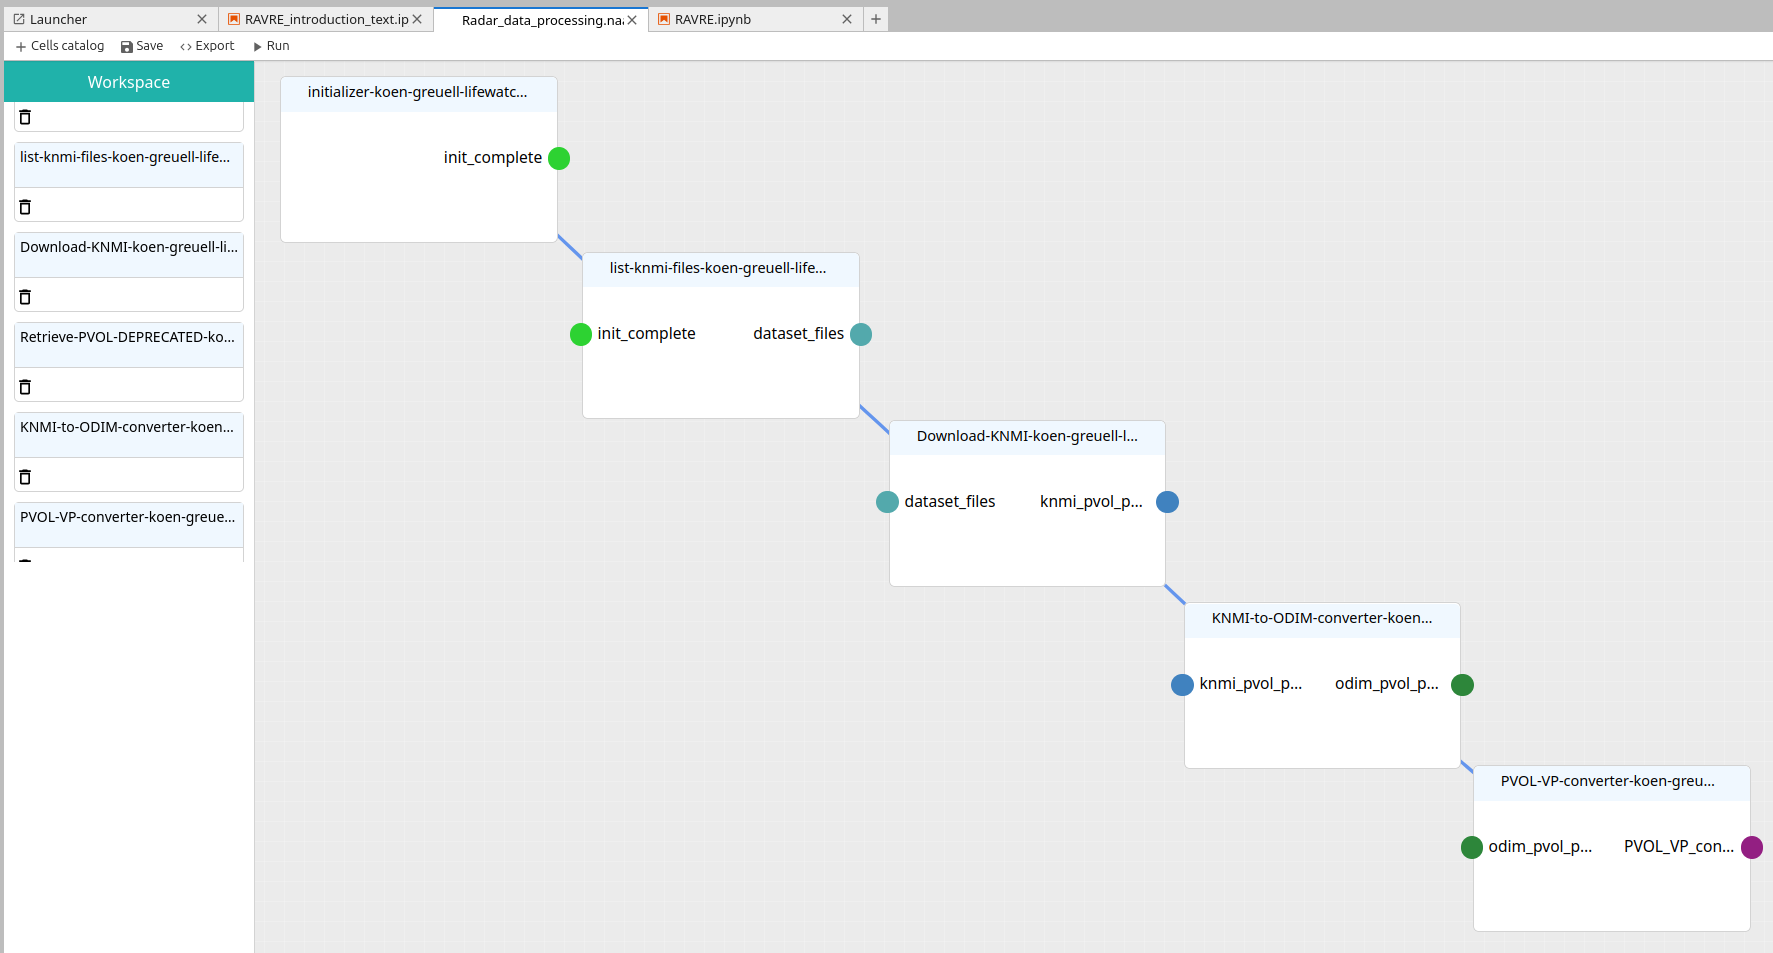

**Component 1 - Initialization:** The initializer checks if the workflow if configured correctly to process polar volume data. For instance, it makes sure it can find certain reference files in order to understand which Radars are being requested.

**Component 2 - Accessing KNMI Data Platform:** The second component, *list-knmi-files*, communicates with the data repository of the KNMI. The component requests a KNMI API which files it has for our search query. We will search by specifying three parameters: `start_date`, `end_date`, `radar`. If succesfull, the KNMI API will respond with a list of file names corresponding to Radar Measurements for our query.

`Note:` The measurement interval for Dutch Meteorological Radars is 5 minutes. This means that each Radar can produce up to 288 measurements in a given day. Occasionally, radars fail to produce measurements and will therefore have less than 288 files. This code block has been adjusted such that it yields files in an interval of 15 minutes as opposed to 5 minutes. This is deliberately done in an attempt to reduce the strain on the servers and services. For research purposes it may be usefull to set the interval to 5 minutes but during the tutorial a 15 minute interval should be kept. 

**Component 3 - Download Polar Volume data:** The third component, *Download-KNMI*, downloads the data from the KNMI.

**Component 4 - Converting Polar Volume data:** The files that we are downloading from the KNMI API are HDF5 files which contain Polar Volumetric data. The data is currently structured according to the [data model of KNMI](https://www.knmi.nl/kennis-en-datacentrum/publicatie/knmi-hdf5-data-format-specification-v3-5). Most of our analysis methods expect the format of the data model of [ODIM](https://www.eumetnet.eu/wp-content/uploads/2019/01/ODIM_H5_v23.pdf) which means we need to run a converter. This component will call a converter to convert the KNMI format to an ODIM format and returns us a list of files in ODIM format.

`Note:` This component executes a subprocess call to a custom C program written by [Hidde Leijense](https://www.knmi.nl/research/publications?author=+Hidde+Leijnse) of KNMI. Hidde Leijense is often involved in research with the Animal Movement Ecology of the University of Amsterdam as the KNMI and UvA collaborate frequently.
We only convert the structure of data, not the file type. Both the KNMI and ODIM use the same filetype, [HDF5](https://www.hdfgroup.org/solutions/hdf5/). HDF5 is an industry standard hierarchial data storage. 

**Component 5 - Producing vertical profiles:** We have all the components in place to search, download, convert Polar Volume (PVOL) data into a format that we can start analyzing but also process further into more derivatives, such as a vertical profile. A vertical profile (VP) is a way for us to 'summarize' the large amount of data that the Polar Volume shows us. A polar volume of The KNMI can have up to 16 different parameters measured per elevation angle. Each radar measures a number of elevation angles. For that elevation, it measures a host of different quantities and returns those as datasets per quantity and elevation angle. For us to interpret all those elevation angles and quantities is extremely difficult. To alleviate this difficulty, a vertical profile can be generated using the vol2bird algorithm which analyses relevant quantities and elevation angles and attempts to determine the number of birds that have passed over an imaginary cross-section across the radar. It produces that information in a format which indicates per height bin a number of metrics. These metrics include the reflectivity in that specific bin, the expected number of birds / area and so on. The [github page of Vol2bird](https://github.com/adokter/vol2bird) contains more information on vol2bird and includes links to publications explaining how vol2bird works. 

`Note: Naming conventions` There is a lot of Python code involved here. Most of this code is applying naming conventions and versioning. The AME group of the University of Amsterdam has over 9.5 million Vertical Profiles stored in two (synchronized) storage systems. In order to provide overview and structure a strong naming convention has been enforced within the AME group to great success.

**Workflow execution**
We now have a functional workflow which can retrieve and process any radar data from the Herwijnen or Den Helder meteorological radars. We will now configure our workflow in such a manner that we will zoom in on a known mass migration event. The mass migration event was logged by [Judy Shamoun-Baranes](https://www.uva.nl/profiel/s/h/j.z.shamoun-baranes/j.z.shamoun-baranes.html) head of Animal Movement Ecology, University of Amsterdam.

We are now going to run the workflow. Find the `Run` button in the experiment manager and press it. An `execute workflow` pop-up should appear:

<img src="attachment:cf9d07a8-88e5-4d13-8e86-8af56c77d420.png" width="400">

Now, click `Use notebook parameter values`.

The majority of the parameters should be filled in.

Next, change the following parameters: 
- param_end_date = `2024-12-31T23:30+00:00`
- param_interval = `15`
- param_radar = `HRW`
- param_start_date = `2024-12-31T22:30+00:00`
- param_user_number = `[Your user number provided at the training event]`
- secret_key_knmi_api = `[KNMI API key (See "Meteorological radar data")]`
- secret_minio_access_key = `[MinIO Access key (See "MinIO storage")]`
- secret_minio_secret_key = `[MinIO Secret key (See "MinIO storage")]`

Execute your workflow by clicking the `Execute` button. 

The following should show:

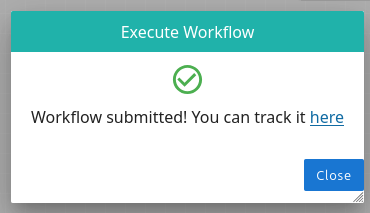

Now click `here` to track the workflow.

In case you've lost the pop-up, you can find your workflow here: https://staging.demo.naavre.net/argowf . Look for a workflow that has your username, has started recently and open it.

You should see a page that shows the progress of your workflow execution similar to this:

<img src="attachment:1385ee40-c981-4c62-9e3c-fac2dbff33b4.png" width="500">

Retrieving the data from KNMI and processing it will take between 30 seconds and 5 minutes. 

**Workflow failure:** If the workflow did not execute successfully, a red cross will appear. In that case, click on the red cross of the failed component (1) and click on `LOGS` (2):

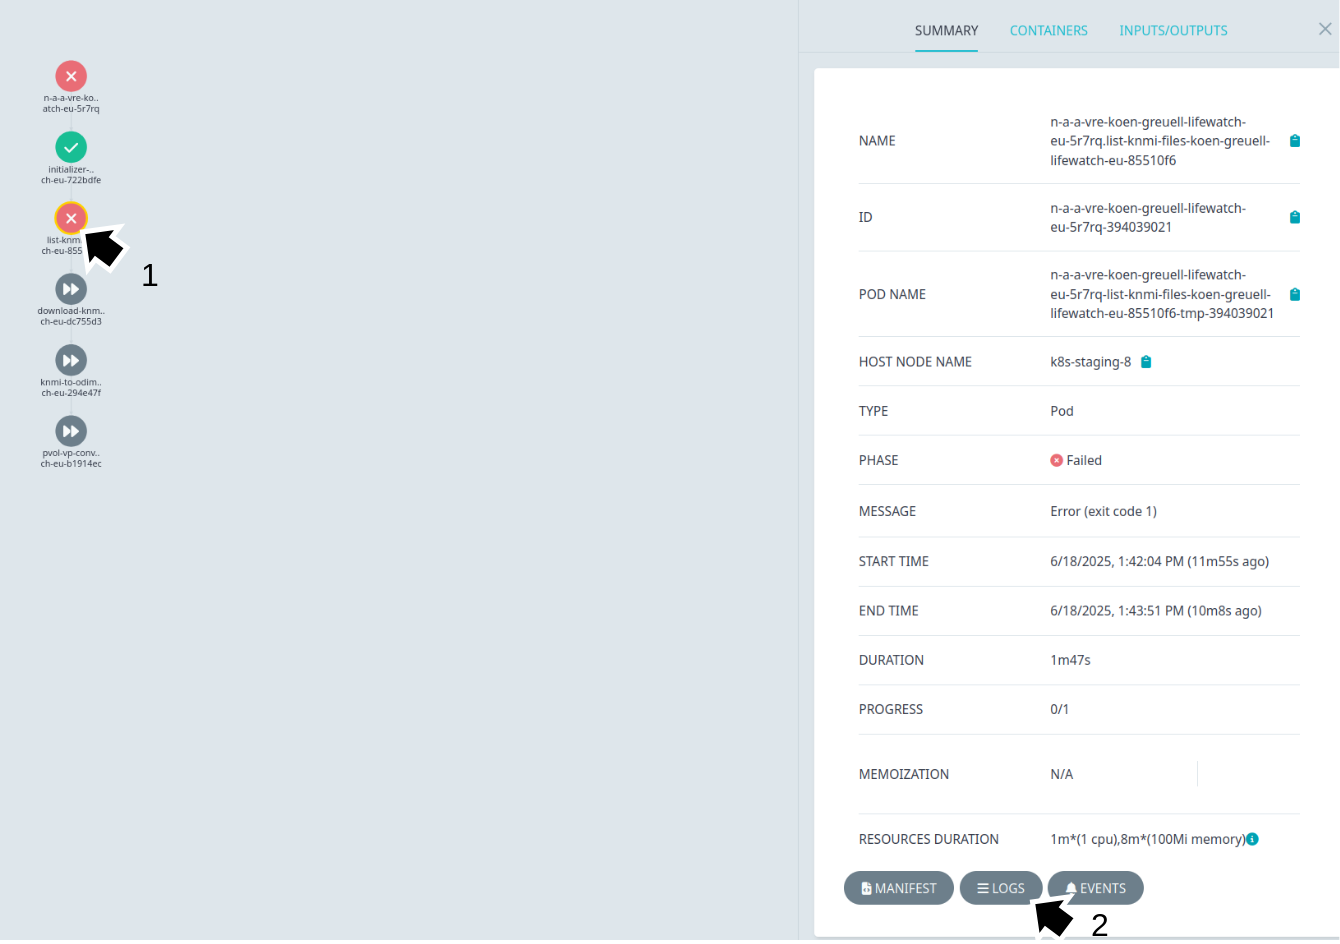

Inspect the logs and try to fix the error. It might be possible to fix the error by changing that parameters of the workflow run. 

**Workflow success:** If the workflow completes successfully, all components in Argo will show a green checkmark:

<img src="attachment:392fc948-5292-4729-b426-22cf7753c2f4.png" width="500">

In that case, let's check whether the files are stored on MinIO. Go to https://scruffy.lab.uvalight.net:9001/login

Log in with the same credentials as you've used to log in to NaaVRE (SSO, or username and password).

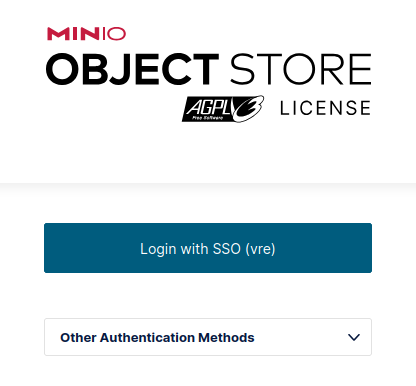

You should see the following on your screen:

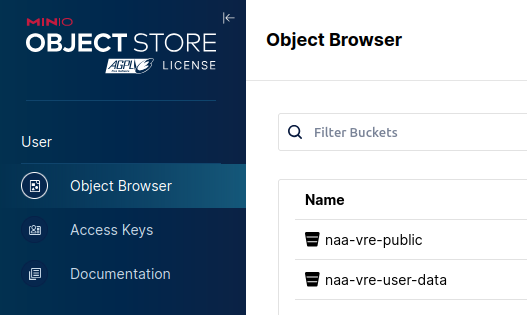

Let's see if you have the expected files. Navigate in the MinIO Object Browser to *'naa-vre-user-data/ravl-tutorial/user[Your user number]'*. Browse through the directories. What and how many files do you see and how does this match your expectation? 

*By the end of this exercise, you have run a data processing pipeline to retrieve weather radar data and unravelled the biological scatter contained within it. In the following exercises you will learn how to visualise such data.* 

### Exercise 2. Data visualization - Creating a timeseries from Vertical Profiles
Prerequisites: This exercise requires minimal programming experience. You will need to paste code into Jupyter notebook, change variables, and run it.

Exercise 1 has shown how to download weather radar data and run the vol2bird algorithm to retrieve biological scattteres from that data. The amount of data you have processed in that exercise is limited. There is a larger public set of vertical profiles (VP) and polar volumes (PVOL) available in MinIO that is accessible to anyone. Check out this dataset in [MinIO in the directory 'naa-vre-public/vl-vol2bird/ravl-tutorial'](https://scruffy.lab.uvalight.net:9001/browser/naa-vre-public/dmwtdm9sMmJpcmQvcmF2bC10dXRvcmlhbC8=).

The most convenient way to visualize radar data is by using the library bioRad, written in R. We can use the Jupyter notebook to create an R session which has bioRad installed. Click the `+` button on the top right and start a new R notebook with *'R[conda env:ravl]'*. Verify that the correct conda environment has been selected by checking the top right corner:

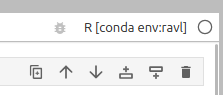

Paste the code in the R notebook cell, replace _\<YOUR_MINIO_ACCESS_KEY\>_ and _\<YOUR_MINIO_SECRET_KEY\>_ and run the cell.
```R
Sys.setenv(
  AWS_ACCESS_KEY_ID = "<YOUR_MINIO_ACCESS_KEY>",
  AWS_SECRET_ACCESS_KEY = "<YOUR_MINIO_SECRET_KEY>",
  AWS_S3_ENDPOINT = "scruffy.lab.uvalight.net:9000",
  AWS_DEFAULT_REGION = "nl-uvalight"
)
library("lubridate")
library("stringr")
library("aws.s3")
library("assertthat")
# Functions
download_prefix <- function(prefix, bucket_name, start_date, end_date, which = "first", local_dir) {
  assert_that(is.character(prefix))
  assert_that(is.character(bucket_name))
  assert_that(is.POSIXct(start_date))
  assert_that(is.POSIXct(end_date))
  assert_that(is.character(which))
  assert_that(is.character(local_dir))
  if (which == "first") {
    comp <- expression(datetime_obj >= start_date & datetime_obj <= end_date)
  } else if (which == "last") {
    comp <- expression(datetime_obj <= end_date & datetime_obj >= start_date)
  } else if (which == "middle") {
    comp <- TRUE
  } else {
    print("Did not understand argument which, please use first, middle or last")
    return()
  }
  # make sure we have a trailing slash
  if (!(endsWith(prefix, "/"))) {
    prefix <- paste0(prefix, "/")
  }
  # Return a dataframe with objects within the adjusted prefix
  object_df <- get_bucket_df(
    bucket = bucket_name,
    max = 1000,
    prefix = prefix,
    delimiter = "/",
  )
  # Considering this is the first prefix, we need to include a time selection.
  # the comparison is > than the start time.
  for (key in object_df$Key) {
    parts <- basename(key) %>% str_split("_")
    datetime_str <- unlist(parts)[[3]] %>% str_replace("T", "")
    datetime_obj <- as.POSIXct(datetime_str, tz = "UTC", format = "%Y%m%d%H%M")
    if (eval(comp)) {
      type_radar_date_prefix <- str_replace(prefix, username, "")
      # remove leading slash and trailing slash, it will be added with paste
      if (startsWith(type_radar_date_prefix, "/")) {
        type_radar_date_prefix <- str_sub(type_radar_date_prefix, 2, -2)
      }
      file_path <- paste(local_dir, type_radar_date_prefix, basename(key), sep = "/")
      dir.create(dirname(file_path), recursive = T, showWarnings = F)
      print(paste("Downloading", basename(file_path), "to", file_path))
      save_object(object = key, bucket = bucket_name, file = file_path)
    }
  }
}

parse_radar_name <- function(radar_name) {
  assert_that(is.character(radar_name))
  if (radar_name == "herwijnen") {
    rad <- "NL/HRW"
  } else if (radar_name == "denhelder") {
    rad <- "NL/DHL"
  } else {
    "Radar not understood. Please enter either herwijnen or denhelder"
    rad <- NULL
  }
  return(rad)
}

date_prefix_from_datetimestamp <- function(date_timestamp) {
  assert_that(is.POSIXct(date_timestamp))
  year_str <- year(date_timestamp)
  month_str <- month(date_timestamp) %>% str_pad(2, pad = "0")
  day_str <- day(date_timestamp) %>% str_pad(2, pad = "0")
  date_prefix <- paste(year_str,
    month_str,
    day_str,
    sep = "/"
  )
  return(date_prefix)
}

get_prefixes_from_date_range <- function(start_date, end_date) {
  assert_that(is.POSIXct(start_date))
  assert_that(is.POSIXct(end_date))
  date_timestamps <- seq(start_date, end_date, by = "5 mins")
  # loop through each time stamp to produce a prefix
  date_prefixes <- vector(mode = "list", length = length(date_timestamps))
  i <- 1
  for (date_timestamp in as.list(date_timestamps)) {
    date_prefix <- date_prefix_from_datetimestamp(date_timestamp)
    # print(date_prefix)
    date_prefixes[[i]] <- date_prefix
    i <- i + 1
  }
  unique_date_prefixes <- unique(date_prefixes)
  return(unique_date_prefixes)
}

get_data_storage_directory <- function(bucket_name, datatype, radar, date_directory) {
  # Test if we are targetting the public bucket. If we are,
  # We do not need to do any username parsing.
  # [naa-vre-public]/vl-vol2bird/CO/RAD/YYYY/MM/DD/files
  radar_directory <- parse_radar_name(radar)
  if (bucket_name == "naa-vre-public") {
    return <- paste("vl-vol2bird", "ravl-tutorial", datatype, radar_directory, date_directory, sep = "/")
  } else if (bucket_name == "naa-vre-user-data") {
    # Adjust the prefix to include the username, datattype and radar
    print(paste("Processing first prefix", date_directory))
    return <- paste(username, datatype, radar_directory, date_directory, sep = "/")
  } else {
    print("!expected error!")
    stop(paste("Bucket name: ", bucket_name, " not recognized. Please use either 'naa-vre-public' or 'naa-vre-user-data' as bucket_name argument"))
  }
}

download_data <- function(start_date,
                          end_date,
                          radar,
                          datatype,
                          username,
                          bucket_name = "naa-vre-user-data") {
  assert_that(is.character(start_date))
  assert_that(is.character(end_date))
  assert_that(is.character(radar))
  assert_that(is.character(datatype))
  assert_that(is.character(username))
  # These settings can be hardcoded
  local_dir <- "/home/jovyan/workshop_data"
  # convert to posix obj
  start_date <- as.POSIXct(str_replace(start_date, "T", " "), tz = "UTC")
  print(start_date)
  end_date <- as.POSIXct(str_replace(end_date, "T", " "), tz = "UTC")
  print(end_date)
  # Determine how many days are between posix start and ends.
  # Each day is always it's own prefix.
  unique_date_prefixes <- get_prefixes_from_date_range(start_date, end_date)
  # The first and last prefix should be checked for the times
  # Any prefix in between should not need to be evaluated
  first_prefix <- unique_date_prefixes[[1]]
  # Remove that prefix from the to process prefixes
  unique_date_prefixes[[1]] <- NULL
  # Check if the unique date prefixes are empty now.
  # If it is empty, we can skip everything else.
  if (!(rlang:::is_empty(unique_date_prefixes))) {
    last_prefix <- unique_date_prefixes[[length(unique_date_prefixes)]]
    # Remove the last prefix as well from the process prefixes
    unique_date_prefixes[[length(unique_date_prefixes)]] <- NULL
  }
  rad <- parse_radar_name(radar)
  # Get a dataframe from the first prefix, this matches start date
  prefix <- first_prefix
  # Get the directory of the file to retrieve
  prefix_adjusted <- get_data_storage_directory(bucket_name, datatype, radar, prefix)
  # Download the data
  download_prefix(
    prefix = prefix_adjusted,
    bucket_name = bucket_name,
    start_date = start_date,
    end_date = end_date,
    which = "first",
    local_dir = local_dir
  )
  # Middle prefixes
  for (prefix in unique_date_prefixes) {
    print(paste("Processing middle prefix(es)", prefix))
    prefix_adjusted <- get_data_storage_directory(bucket_name, datatype, radar, prefix)
    download_prefix(
      prefix = prefix_adjusted,
      bucket_name = bucket_name,
      start_date = start_date,
      end_date = end_date,
      which = "middle",
      local_dir = local_dir
    )
  }
  if (exists("last_prefix")) {
    # Last prefix
    prefix <- last_prefix
    print(paste("Processing last prefix", prefix))
    prefix_adjusted <- get_data_storage_directory(bucket_name, datatype, radar, prefix)
    download_prefix(
      prefix = prefix_adjusted,
      bucket_name = bucket_name,
      start_date = start_date,
      end_date = end_date,
      which = "last",
      local_dir = local_dir
    )
  }
}
```
The previous cell contains R code to be able to access a selection of data and store it in our Virtual Lab. In exercise 1, we have processed a small time-range of radar data for a given radar location. With our workflow we have produced two different types of data: Polar Volumes and Vertical Profiles. Vertical Profiles are derivatives from Polar Volumes and show you a summarized result. In this exercise we are going to use more data than we downloaded and processed in exercise 1, covering 3 days. The dataset is available in [MinIO](https://scruffy.lab.uvalight.net:9001/browser/naa-vre-public/dmwtdm9sMmJpcmQvcmF2bC10dXRvcmlhbC8=). We can retrieve these Vertical Profiles and combine them into a time series. The timeseries can be indicative of Migration moments as the Vertical Profile holds an estimate of number of birds per km2. We can plot that value over time and as such we _should_ be able to indicate times where there is significant migration.    

Now, we will add the last code to finalize the downloading of data. Add a second cell and copy paste the following code:

```R
start_date <- "2022-10-17T12:00:00+00:00"
end_date <- "2022-10-20T12:00+00:00"
radar <- "herwijnen"
datatype <- "vp"
username <- "<YOUR_USERNAME>" # Not required for public
bucket_name <- "naa-vre-public"
download_data(
  start_date = start_date,
  end_date = end_date,
  radar = radar,
  datatype = datatype,
  username = username,
  bucket_name = bucket_name
)
```
Execute the code.

If everything went as expected, you can navigate to `/home/jovyan/workshop_data/` where you should see directories. Navigate the directories and visually confim that the data you expect is there. If it is not, signal one of the instructors to come and help. 

Now we have our data ready, we can start visualizing it in R. We will be using bioRad for the visualization of Vertical Profiles into a Vertical Profile timeseries. More information about bioRad and it's functions can be found [here](https://adriaandokter.com/bioRad/articles/bioRad.html).



Create a new cell (Cell number 3) and add the following code in the cell:

`Note:` We have downloaded files to the _workshop_data/vp directory_. These files are organized in a fashion that each country, radar, year, month, day combination gets a unique directory where files will be stored. You can see in the code that the directory that we are looking at does not include this information. It will instead look for _every_ file. At later stages, when we collect more data we can narrow our search by including the radar, country, year month and day information. 


The following code generates a Vertical Profile Time Series which indicates per height bin a number of birds / km3. The library bioRad is usefull library to analyze and interact with Radar Data and derivatives. 

```R
# Load bioRad
library('bioRad')
# Specify the location of where Vertical Profiles are stored
vp_dir <- "/home/jovyan/workshop_data/vp/"
# Return the file paths
vp_file_paths <- list.files(vp_dir, full.name = TRUE, pattern = "*.h5", recursive = TRUE)
# Read the file paths and generate a list of Vertical Profile Objects
vp_list <- bioRad:::read_vpfiles(vp_file_paths)
# convert the list of vertical profiles into a time series:
vpts <- bind_into_vpts(vp_list)
# regularize VPTS
reg_vpts <- regularize_vpts(vpts)
plot(reg_vpts)
```
This plot shows quite some activity. The graph shows the expected number of birds / km3. We can see that most of the movement around the radar happened below 1000m. Furthermore, the small 'flags' are windbarbs and show the general speed and direction. 

We can also create a height integrated graph which will display the total number of birds crossing an imaginary line per hour. 
Create another cell, and add the code below. Once pasted, excute the cell.
```R
integrated_vpts <- integrate_profile(vpts)
plot(integrated_vpts)
```

This graph is easier to interpret in order to detect when significant movement occurs. We can see multiple peaks and dips in the graphs. The shaded areas indicate the time that the sun is down. It looks like there is significant movement in the evenings of 19th and 20th of October. 

### Exercise 3 - Zoom in on Migration with Polar Volumes
Prerequisites: This exercise requires that you have successfully run the code from exercise 2.

First, lets look at a moment with less activity: 2022-10-18 T 16:00 UTC. Paste the following code in the Jupyter notebook you have opened in exercise 2, and run the cell.

```R
start_date <- "2022-10-18T16:00+00:00"
end_date <- "2022-10-18T16:00+00:00" # Test for a single file
radar <- "herwijnen"
datatype <- "pvol"
username <- "<YOUR_USERNAME>" # Not required for public
bucket_name <- "naa-vre-public"
download_data(
  start_date = start_date,
  end_date = end_date,
  radar = radar,
  datatype = datatype,
  username = username,
  bucket_name = bucket_name
)
```

And then in order to visualize, copy the path printed by the download function and paste it in `"<MY_PVOL_PATH>"`:
```R
# Temporarily install extra packages for map visualizations
install.packages("ggspatial")
install.packages("prettymapr")
install.packages("rosm")
install.packages("plotly")
library('bioRad')
target_elevation = 2
target_param = "DBZH"
basemap <- rosm::osm.types()[1]
my_pvol <- bioRad::read_pvolfile("<MY_PVOL_PATH>",param = c("DBZH","VRADH"))
my_scan <- get_scan(x=my_pvol,
                    elev=target_elevation,
                    all = FALSE)
my_param <- get_param(my_scan,param = target_param)
ppi <- project_as_ppi(my_param)
map(ppi, map = basemap, alpha = 0.6) 
```
As we can see, there are some reflections being measured quite close around the Radar. 

Lets do the same visualization exercise but for more activity.

According to our integrated graph, we can see that there is a lot of activity going on in the sky around 2022-10-18 T 18:00 UTC. Let's retrieve a Polar Volume for that timestamp and visualize it. 

```R
start_date <- "2022-10-18T18:00+00:00"
end_date <- "2022-10-18T18:00+00:00" # Single file when start and end are identical
radar <- "herwijnen"
datatype <- "pvol"
username <- "<YOUR_USERNAME>" # Not required for public
bucket_name <- "naa-vre-public"
download_data(
  start_date = start_date,
  end_date = end_date,
  radar = radar,
  datatype = datatype,
  username = username,
  bucket_name = bucket_name
)
```
We will be visualizing reflectivity (DBZH) for a given elevation angle. A radar scans numerous parameters for a range of elevation angles. We will be retrieving one single elevation angle and look at a single parameter. For the visualization, we will create a Plan Position Indicator. This centers the radar antenna in the center of the image. We will be placing it on a basemap such that we can see context of the radars location. Lastly, we will be doing this for elevation angle 2.0 (deg). Realize that as the radar beam travels under an angle, it gains altitude. This means that the further the values are the higher they are above ground. 

To visualize it we can use the following code:
```R
target_elevation = 2
target_param = "DBZH"
basemap <- rosm::osm.types()[1]
my_pvol <- read_pvolfile("<MY_PVOL_PATH>",param = c("DBZH","VRADH"))
my_scan <- get_scan(x=my_pvol,
                    elev=target_elevation,
                    all = FALSE)
my_param <- get_param(my_scan,param = target_param)
ppi <- project_as_ppi(my_param)
map(ppi, map = basemap, alpha = 0.6) 
```
Change `"<MY_PVOL_PATH>"` with the path that was printed from retrieving the PVOL.


As you can see these two images differ. However, you can't tell without context what is going on: is there any movement at all? Ideally, we would view a animation of the Polar Volume Plan Position Indicators. We now have a reasonable idea around which dates and times we can expect a mass migration event. 
Build a workflow that: 
1. Set the workflow parameters such that the PVOL DOWNLOADER downloads a selection of polar volume data 1 hour before and 1 hour after the migration event
2. Containerize R code that creates the previously generated maps (adjust to your liking) from the Polar Volumes
3. Attach PVOL Downloader and the Map creating container together to create a new workflow.
4. Submit the workflow with the correct parameters

Example R code to containerize
```R
# R-PPI
# ---
# NaaVRE:
#  cell:
#   inputs:
#    - pvol_paths : List
#   outputs:
#    - ppi_paths : List
#   params:
#    - param_param : String
#    - param_elevation : Float
# ...

# libraries
library('bioRad')
library("stringr")
library("ggplot2")
title_from_pvol <- function(pvol) {
  date_prefix <- strftime(my_pvol$datetime, format = "%Y/%m/%d T %H:%M UTC", tz = "UTC")
  corad <- pvol$radar
  co <- substring(corad, 1, 2)
  rad <- substring(corad, 3, 5)
  corad_prefix <- paste0(c(co, rad), collapse = "/")
  corad_prefix <- toupper(corad_prefix)
  title_str <- paste0(c(co, rad, date_prefix), collapse = " ")
  title_str <- toupper(title_str)
  return(title_str)
}
# Retrieve the basemap
basemap <- rosm::osm.types()[1]
# initialize a output list for files
ppi_paths <- list()
for (pvol_path in pvol_paths) {
  my_pvol <- read_pvolfile(pvol_path, param = c("DBZH", "VRADH"))
  my_scan <- get_scan(
    x = my_pvol,
    elev = param_elevation,
    all = FALSE
  )
  my_param <- get_param(my_scan, param = param_param)
  ppi <- project_as_ppi(my_param)
  # If elevation has a '.' in it, like 2.5, substitute the '.' for a '-'.
  # Otherwise certain operating systems confuse it for a suffix.
  elev <- my_scan$attributes$where$elangle %>% str_replace("\\.", "-")
  # Create an image name
  imname <- basename(pvol_path) %>%
    str_replace(".h5", ".png") %>%
    str_replace("pvol", paste("ppi", param_param, elev, sep = "_"))
  print(imname)
  # Create an image directory
  impath_dir <- pvol_path %>%
    str_replace(conf_local_pvol, conf_local_ppi) %>%
    str_replace(basename(pvol_path), "")
  impath_dir <- paste(impath_dir, param_param, elev, sep = "/")
  # Create the directory
  dir.create(file.path(impath_dir), recursive = TRUE, showWarnings = FALSE)
  # Create a image path
  impath <- paste(impath_dir, imname, sep = "/")
  title_str <- title_from_pvol(my_pvol)  
  subtitle_str <- paste("param:",param_param, "- elevation angle:",param_elevation)
  png(impath, width = 1024, height = 1024, units = "px")
  plt <- map(ppi, map = basemap, alpha = 0.6) +
    ggtitle(title_str, subtitle = subtitle_str) +
    theme(plot.title = element_text(size = 40, face = "bold", hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))
  print(plt)
  dev.off()
  ppi_paths <- append(ppi_paths, impath)
}
```

Animating the images can be done with imagemagick, explain how to do it.

You've now:
. Submitted multiple workflows causing Virtual Machines to start, communicate and stop automatically
. Downloaded Weather Radar Data from the Royal Dutch Meteorological Institute (KNMI)
. Converted it to a industry standard format `ODIM`
. Produced derivative data (Vertical Profiles) by using the vol2bird algorithm
. Retrieved Polar Volume and Vertical Profile data from the cloud
. Visualized Vertical Profiles in time-series
. Created and visualized Plan Position Indicators made from reflectivity from Polar Volume scans
. Containerized custom R code for visualization
. Built and executed a new workflow to produce Plan Position Indicators for a large range of Polar Volumes through cloud computing
. Created an animation from Plan Position Indicators, visualizing Radar images measuring actual biological movement.

# Open questions
## Identifying migration moments 
Check an external database for favorable conditions for migrations, run the data processing pipeline and inspect the time series result.

- Rerun the workflow for other interesting dates
- Easy, No coding experience required. 

As the above list shows - you've accomplished a great deal. For this course text, we've provided some information on when we can expect certain migratory events. As an open exercise, feel free to use all the knowledge and information you've gained to find a _new_ migration event. This time - we do not have the convenience of having a line graph indicating moments of high migration. You also do not have the time during this workshop to process a full year of data for a given radar. So, instead, try and use external sources. 

We now know that passerines:
1. Wait for favourable wind conditions
2. In Autumn, migrate predominately in a South East fashion
3. in Spring migratie predominately in a North West fashion
4. Will migrate after sunset and before sunrise

Use the external database for Wind to find favourable wind conditions in either migratory season for a year of your choice. Try and a date that would have proper wind conditions. You can also check weather forecasts and reports to see if that particular day had a lot of rain or not. If it did - birds likely stayed aground. 

Once you've found a date, set all parameters for a day before and after. Then go through all exercises but now with your own start and end date. 

### Peak migration events based on Weather variables
As mentioned in the introduction, it seems that birds tend to wait for favourable weather conditions before departing. Sometimes it takes too long to find these weather conditions and the birds depart in seemingly bad conditions. Therefore, we can't fully say when they depart but we can have a good estimate of when could be a good moment. By reviewing weather variables we can therefore estimate when birds could be departing en masse. 

Objective: Use weather variables to estimate when there would be a peak migration event. Once identified, generate PVOL and VP and visualize the results. 

### Information
The website you can use to view a host of weather variables can be found here: [earth.nullschool.net](https://earth.nullschool.net/#2017/07/26/2200Z/wind/surface/level/orthographic=7.88,51.69,2762/loc=7.511,49.824). For Autumn migration, winds originating from the North and heading South, SouthWest seem to be favourable for passerine migration. In Spring (February - May) winds originating from the South and heading North NorthEast seem to be favourable. Furthermore, regardless of season rain is not favourable. 

To get you started, a few dates will be shown to you of where there is a peak migration event positive weather variables. Try some of the dates and see if you can see the favourable wind conditions. Also see what the wind direction was before the 8th of october and after the 13th of october. After that, use the earth.nullschool.net website to find more moments in time that could warrant peak migration. Pick one and visualize and verify.

Night of 8th of October, 2022
```python
start_date = '2022-10-08T18:00:00+00:00'
end_date = '2022-10-09T06:00:00+00:00'
radar = 'herwijnen' # denhelder not available
```
Night of 9th of October, 2022
```python
start_date = '2022-10-09T18:00:00+00:00'
end_date = '2022-10-10T06:00:00+00:00'
radar = 'herwijnen' # denhelder not available
```
Night of 10th of October, 2022
```python
start_date = '2022-10-10T18:00:00+00:00'
end_date = '2022-10-11T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 11th of October, 2022
```python
start_date = '2022-10-11T18:00:00+00:00'
end_date = '2022-10-12T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 12th of October, 2022
```python
start_date = '2022-10-12T18:00:00+00:00'
end_date = '2022-10-13T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
This night specifically is rather spectacular and has very telling weather variables before and during.
Night of 18th of Ocotber, 2022
```python
start_date = '2021-10-18T18:00:00+00:00'
end_date = '2022-10-19T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
The following dates are peak migration nights but the weather variables are not favourable. Have a look at these dates and also look at the weather variables before and after the migration. We expect the birds to have left as they waited long enough and decided to migrate in less optimal conditions. 
Night of 6th of Ocotber, 2021
```python
start_date = '2021-10-06T18:00:00+00:00'
end_date = '2022-10-07T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 7th of Ocotber, 2021
```python
start_date = '2021-10-07T18:00:00+00:00'
end_date = '2022-10-08T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 8th of Ocotber, 2021
```python
start_date = '2021-10-08T18:00:00+00:00'
end_date = '2022-10-09T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 12th of Ocotber, 2021
```python
start_date = '2021-10-06T18:00:00+00:00'
end_date = '2022-10-07T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 13th of Ocotber, 2021
```python
start_date = '2021-10-06T18:00:00+00:00'
end_date = '2022-10-07T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```


### Extra information
You can e-mail your findings to `b.c.wijers@uva.nl` with the title `Lifewatch BEes 25 RAVL - Peak migration`. We will then discuss your findings with the Animal Movement Ecology group and provide feedback. 


## Fireworks and Birds. 
Quite some research is being done to determine the effect and scope of fireworks on birds. I think we can all imagine the effect fireworks has on birds - but can we see this effect in Radar Data?

Objective: Generate Polar Volumes and Vertical Profiles for either (or both) radars around New Years Eve. 

First, visualize and interpret one New Years Eve. Once done - create a larger temporal span (i.e. include more years) and interpret the effect of fireworks on birds over the year. 
* Is the effect of Fireworks increasing, decreasing, other?
* What happened during the recent Corona Pandemic. Did we see an increase, decrease, other effect? 
  1. During the Corona Pandemic, The Netherlands banned the use of all fireworks by it's citizens. 
  2. During 'normal' years The Netherlands allows its citizens to be launch a great variation of fireworks. 


### Extra information
You can e-mail your findings to `b.c.wijers@uva.nl` with the title `Lifewatch BEes 25 RAVL - Fireworks`. We will then discuss your findings with the Animal Movement Ecology group and provide feedback. 


# Publications and papers regarding migration
* Kranstauber B, Bouten W, van Gasteren H, Shamoun-Baranes J. 2022. Ensemble
predictions are essential for accurate bird migration forecasts for conservation
and flight safety. Ecological Solutions and Evidence 3(3)
* van Dobben H, 1953. Bird migration in the Netherlands. Ibis (95)
* van Doren BM, Horton KG. 2018. A continental system for forecasting bird migration.
Science 361:1115–1118.
* Richardson WJ. 1978. Timing and Amount of Bird Migration in Relation to Weather:
A Review. Oikos 30:224–272.

# Open data repositories
* Vertical profiles in Europe
    * [aloftdata](https://aloftdata.eu/)
* Polar Volume data The Netherlands
    * [knmi](https://data.knmi.nl)
* Polar Volume data Germany
    * [dwd](https://opendata.dwd.de/)
* Polar Volume Data Danmark
    * [dmi](https://confluence.govcloud.dk/display/FDAPI)








# Extra content, to be built into exercises

## reusability of data produced in radaero exercises
The data you've produced can be analyzed with the bioRad package. [RadAero2022](https://adriaandokter.com/bioRad/articles/rad_aero_22.html) are introductory exercises on bioRad where you will be reading Polar Volumes, Vertical Profiles generating and Range Bias Corrected data. All data generated in this course can be used in the RadAero2022 exercises in bioRad. You can skip downloading vertical profiles and polar volumes in the RadAero2022 exercises as you have just generated those in your RAVL environment. It is recommended to have a look and try some of these commands on the data you've just produced. Try creating a Plan Position Indicator from one of the Polar Volumes you've generated. 
## After bioRad interactive on Jupyter, text that can accompany for the containerization
On the left hand side, you can see the `component containeriser`. This allows us to store the code we just entered in the notebook as a code-block. We will eventually make a few more of these code-blocks and use them to make a workflow out of them. Click the `component containeriser` and containerise the code. Now your code cell is configured and you can go ahead and press `Create`. It will take a few minutes before it shows up in our cell catalogue. Instead of waiting, we are going to continue adding some more blocks.

